In [1]:
from chembl_webresource_client.new_client import new_client
from collections import Counter

## Task 1

In [2]:
import pandas as pd
drugs = new_client.drug
print(drugs)

[{'applicants': ['Idt Australia Ltd', 'Teva Pharmaceuticals Usa', 'Watson Laboratories Inc', 'American Therapeutics Inc', 'Mylan Pharmaceuticals Inc', 'Pfizer Inc', 'Ivax Pharmaceuticals Inc Sub Teva Pharmaceuticals Usa', 'Novitium Pharma Llc', 'Dava Pharmaceuticals Inc', 'Purepac Pharmaceutical Co'], 'atc_classification': [{'code': 'C02CA01', 'description': 'CARDIOVASCULAR SYSTEM: ANTIHYPERTENSIVES: ANTIADRENERGIC AGENTS, PERIPHERALLY ACTING: Alpha-adrenoreceptor antagonists'}], 'availability_type': 1, 'biotherapeutic': None, 'black_box': 0, 'black_box_warning': '0', 'chirality': 2, 'development_phase': 4, 'drug_type': 1, 'first_approval': 1976, 'first_in_class': 0, 'helm_notation': None, 'indication_class': 'Antihypertensive', 'molecule_chembl_id': 'CHEMBL2', 'molecule_properties': {'alogp': '1.78', 'aromatic_rings': 3, 'cx_logd': '1.43', 'cx_logp': '1.65', 'cx_most_apka': None, 'cx_most_bpka': '7.24', 'full_molformula': 'C19H21N5O4', 'full_mwt': '383.41', 'hba': 8, 'hba_lipinski': 9

In [3]:
df = pd.DataFrame(drugs)
print(df)

                                              applicants  \
0      [Idt Australia Ltd, Teva Pharmaceuticals Usa, ...   
1      [Mcneil Consumer Healthcare, Perrigo R And D C...   
2      [Daiichi Pharmaceutical Corp, Sandoz Inc, Alvo...   
3      [Watson Laboratories Inc, Sun Pharmaceutical I...   
4                                                   None   
...                                                  ...   
14288                                               None   
14289                                               None   
14290                                               None   
14291                                               None   
14292                                               None   

                                      atc_classification  availability_type  \
0      [{'code': 'C02CA01', 'description': 'CARDIOVAS...                1.0   
1      [{'code': 'N07BA01', 'description': 'NERVOUS S...                2.0   
2      [{'code': 'S02AA16', 'description':

In [4]:
def get_name(drug: list):
    return drug['molecule_chembl_id']

In [5]:
def get_year_approval(year:list):
    return year['first_approval']

In [6]:
drugs[0]['molecule_synonyms']

[{'molecule_synonym': 'CP-12299',
  'syn_type': 'RESEARCH_CODE',
  'synonyms': 'CP-12299'},
 {'molecule_synonym': 'CP-122991',
  'syn_type': 'RESEARCH_CODE',
  'synonyms': 'CP-122991'},
 {'molecule_synonym': 'Prazosin', 'syn_type': 'FDA', 'synonyms': 'Prazosin'},
 {'molecule_synonym': 'Prazosin', 'syn_type': 'ATC', 'synonyms': 'PRAZOSIN'},
 {'molecule_synonym': 'Prazosin', 'syn_type': 'BAN', 'synonyms': 'PRAZOSIN'},
 {'molecule_synonym': 'Prazosin', 'syn_type': 'INN', 'synonyms': 'PRAZOSIN'},
 {'molecule_synonym': 'Prazosin',
  'syn_type': 'MERCK_INDEX',
  'synonyms': 'PRAZOSIN'},
 {'molecule_synonym': 'Prazosin', 'syn_type': 'OTHER', 'synonyms': 'PRAZOSIN'}]

In [7]:
def get_INN(drug: list):
    """returns INN name, use ; as concatenator if more than one value is available"""
    inn = [x['molecule_synonym'] for x in drug['molecule_synonyms'] if x['syn_type'] == 'INN']
    res = ';'.join(inn)
    return(res)


get_INN(drugs[0])

'Prazosin'

In [8]:
id_name = [get_name(x) for x in drugs]
years = [get_year_approval(x) for x in drugs]
names = [get_INN(x) for x in drugs]

In [9]:
task1 = pd.DataFrame({'ID':id_name, 'Name':names, 'FirstApproval':years})
task1.sort_values(by=['Name', 'FirstApproval'], axis=0, inplace=True)
print(task1)

                  ID               Name  FirstApproval
268         CHEMBL90                            1939.0
1069       CHEMBL821                            1939.0
2901       CHEMBL190                            1940.0
4592   CHEMBL1201649                            1942.0
4301   CHEMBL1201235                            1943.0
...              ...                ...            ...
2467    CHEMBL167779        Zuclomifene            NaN
1318     CHEMBL53904     Zuclopenthixol            NaN
12448  CHEMBL4105630         Zuranolone            NaN
12902  CHEMBL4297637  Zuretinol acetate            NaN
12221  CHEMBL3989838       Zylofuramine            NaN

[14293 rows x 3 columns]


In [10]:
drugs_from_2012 = task1.query('FirstApproval >= 2012')\
                         .sort_values(by='FirstApproval', axis=0)
print(drugs_from_2012)

                  ID                   Name  FirstApproval
4067   CHEMBL1194325                                2012.0
11008  CHEMBL3039583            Pasireotide         2012.0
6086   CHEMBL2095212             Mirabegron         2012.0
5918   CHEMBL1963683             Tafluprost         2012.0
7463   CHEMBL2105717           Cabozantinib         2012.0
...              ...                    ...            ...
3938   CHEMBL1096146              Ponesimod         2021.0
13088  CHEMBL4297841      Tisotumab vedotin         2021.0
4904   CHEMBL1289494              Tivozanib         2021.0
13916  CHEMBL4650274                                2021.0
13437  CHEMBL4301162  Serdexmethylphenidate         2021.0

[446 rows x 3 columns]


There are 446 approved drugs from 2012

## Task 2

In [11]:
comp2target = dict()
for d in drugs_from_2012.ID:
    comp2target[d] = set()

# Process compounds in chunks so that we prevent huge queries:
chunk_size = 50
keys = list(comp2target.keys())

for i in range(0, len(keys), chunk_size):
    # we jump from compounds to targets through activities:
    activities = new_client.activity.filter(molecule_chembl_id__in=keys[i:i + chunk_size]).only(
        ['molecule_chembl_id', 'target_chembl_id'])
    # extracting target ChEMBL IDs from activities:
    for act in activities:
        comp2target[act['molecule_chembl_id']].add(act['target_chembl_id'])

# Now our dictionary maps from compound ChEMBL IDs into target ChEMBL IDs
# We next translate the identifier of targets from ChEMBL IDs to UniProt IDs
for key, val in comp2target.items():
    # We don't know how many targets are associated with any compound. Therefore it is
    # better to process targets in chunks, as suggested by the ChEMBL webclient.
    lval = list(val)
    uniprots = set()
    for i in range(0, len(val), chunk_size):
        targets = new_client.target.filter(target_chembl_id__in=lval[i:i + chunk_size]).only(
            ['target_components'])
        uniprots |= {comp['accession'] for t in targets for comp in t['target_components']}

    comp2target[key] = uniprots

In [12]:
UniProt_id = pd.DataFrame([(i, uniprot) for i, j in comp2target.items() for uniprot in j], 
                  columns=['ID','UniProt'])
print(UniProt_id)

                  ID UniProt
0      CHEMBL1194325  P0DTD1
1      CHEMBL1194325  P20309
2      CHEMBL1194325  O95342
3      CHEMBL2095212  P0DTD1
4      CHEMBL2095212  P10635
...              ...     ...
15351  CHEMBL1289494  P41240
15352  CHEMBL1289494  P51956
15353  CHEMBL1289494  P08631
15354  CHEMBL1289494  Q9H093
15355  CHEMBL1289494  P51813

[15356 rows x 2 columns]


In [20]:
UniProt_id.to_csv('20210613-ChEMBL-drugs-since-2012-UniProt.txt', sep='\t')

In [21]:
print(UniProt_id['UniProt'].value_counts())

P0DTD1    179
P08684     48
P00533     45
P28482     45
P06239     43
         ... 
P54750      1
Q9Y233      1
P16499      1
P18545      1
P33534      1
Name: UniProt, Length: 1495, dtype: int64


In [22]:
print('The median value for each target associated with his target is:', UniProt_id['UniProt'].value_counts().median())

The median value for each target associated with his target is: 2.0


## Target 3

In [23]:
import uniprot as uni
import requests
import json
import matplotlib.pyplot as plt

In [24]:
## read in results of task 2
task2_res = pd.read_csv('20210613-ChEMBL-drugs-since-2012-UniProt.txt', sep='\t', index_col=0)

In [43]:
# I tried to use the function from my previous pandas dataframe but i got an error when there were no keywords, 
# I didn't understanden how to correct this, so I use your method reading from a csv file
r = task2_res.UniProt
c = list(r)[:100]
sel = ','.join(c)
## see UniProt API document here: https://www.ebi.ac.uk/proteins/api/doc/#!/proteins/search
url = 'https://www.ebi.ac.uk/proteins/api/proteins?offset=0&size=100&accession='+ sel
t = requests.get(url, headers={'Accept': 'application/json'})

In [44]:
## now let's try to fetch all keywords
def get_keywords(protein: list):
    res = [list(k.values())[0] for k in protein['keywords']]
    if res == None:
        res = []
    return(res)

In [45]:
all_keywords=[]
for jlist in t.json():
    all_keywords.extend(get_keywords(jlist))
keyword_counter = Counter(all_keywords)    
print(keyword_counter)

Counter({'Reference proteome': 99, 'Phosphoprotein': 90, 'Nucleotide-binding': 88, 'ATP-binding': 84, '3D-structure': 83, 'Alternative splicing': 74, 'Transferase': 69, 'Kinase': 67, 'Cytoplasm': 54, 'Serine/threonine-protein kinase': 48, 'Membrane': 43, 'Nucleus': 43, 'Acetylation': 42, 'Disease variant': 36, 'Metal-binding': 32, 'Ubl conjugation': 31, 'Direct protein sequencing': 25, 'Cell membrane': 23, 'Magnesium': 22, 'Transmembrane': 21, 'Transmembrane helix': 21, 'Repeat': 20, 'Tyrosine-protein kinase': 18, 'Isopeptide bond': 17, 'Glycoprotein': 17, 'Proto-oncogene': 16, 'Disulfide bond': 16, 'Host-virus interaction': 16, 'Apoptosis': 15, 'Receptor': 14, 'Signal': 14, 'Mitochondrion': 11, 'Cell cycle': 11, 'Cytoskeleton': 10, 'Cell projection': 9, 'Chromosomal rearrangement': 9, 'Transcription': 9, 'Transcription regulation': 9, 'Coiled coil': 9, 'Endoplasmic reticulum': 8, 'Endosome': 8, 'Developmental protein': 8, 'Cell junction': 8, 'Zinc': 7, 'Hydrolase': 7, 'Golgi apparatus

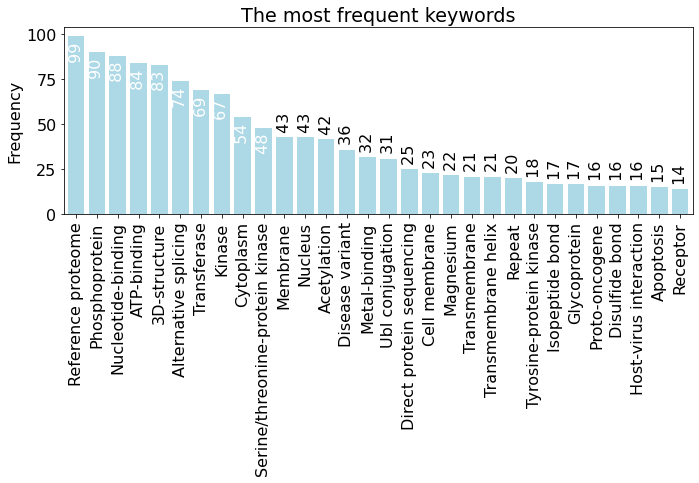

In [46]:
most_common_keywords = keyword_counter.most_common(30)
y = [count for keyword, count in most_common_keywords]
x = [keyword for keyword, count in most_common_keywords]

plt.rcParams["figure.figsize"] = (10,7)
plt.rcParams.update({'font.size': 16})

plt.bar(x, y, color='lightblue')
plt.title("The most frequent keywords")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
for i, (tag, count) in enumerate(most_common_keywords):
    plt.text(i, count, f' {count} ', rotation=90, size=16,
             ha='center', va='top' if i < 10 else 'bottom', color='white' if i < 10 else 'black')
plt.xlim(-0.6, len(x)-0.4) # optionally set tighter x lims
plt.tight_layout() # change the whitespace such that all labels fit nicely
plt.show()

In [47]:
# I tried to use the function from my previous pandas dataframe but i got an error when there were no keywords, 
# I didn't understanden how to correct this, so I use your method reading from a csv file
r = set(task2_res.UniProt)
c = list(r)[100:200]
sel = ','.join(c)
## see UniProt API document here: https://www.ebi.ac.uk/proteins/api/doc/#!/proteins/search
url = 'https://www.ebi.ac.uk/proteins/api/proteins?offset=0&size=100&accession='+ sel
t = requests.get(url, headers={'Accept': 'application/json'})

In [48]:
all_keywords=[]
for jlist in t.json():
    all_keywords.extend(get_keywords(jlist))
keyword_counter = Counter(all_keywords)    
print(keyword_counter)

Counter({'Reference proteome': 97, 'Phosphoprotein': 66, 'Membrane': 57, '3D-structure': 56, 'Alternative splicing': 49, 'Glycoprotein': 43, 'Transmembrane': 43, 'Transmembrane helix': 43, 'Nucleotide-binding': 42, 'Cell membrane': 41, 'Transferase': 38, 'ATP-binding': 37, 'Disulfide bond': 33, 'Cytoplasm': 33, 'Kinase': 32, 'Metal-binding': 31, 'Signal': 26, 'Disease variant': 25, 'Receptor': 25, 'Nucleus': 24, 'Serine/threonine-protein kinase': 24, 'Acetylation': 21, 'Direct protein sequencing': 21, 'Ubl conjugation': 19, 'Magnesium': 19, 'Transport': 17, 'Lipoprotein': 17, 'Hydrolase': 16, 'Repeat': 16, 'Palmitate': 15, 'Ion transport': 14, 'Cell junction': 12, 'Isopeptide bond': 12, 'G-protein coupled receptor': 12, 'Transducer': 12, 'Ion channel': 11, 'Cell projection': 11, 'Endoplasmic reticulum': 10, 'Cytoskeleton': 10, 'Zinc': 10, 'Synapse': 9, 'Lipid metabolism': 8, 'Secreted': 8, 'Postsynaptic cell membrane': 7, 'Glycosidase': 7, 'Apoptosis': 7, 'Tyrosine-protein kinase': 7, 

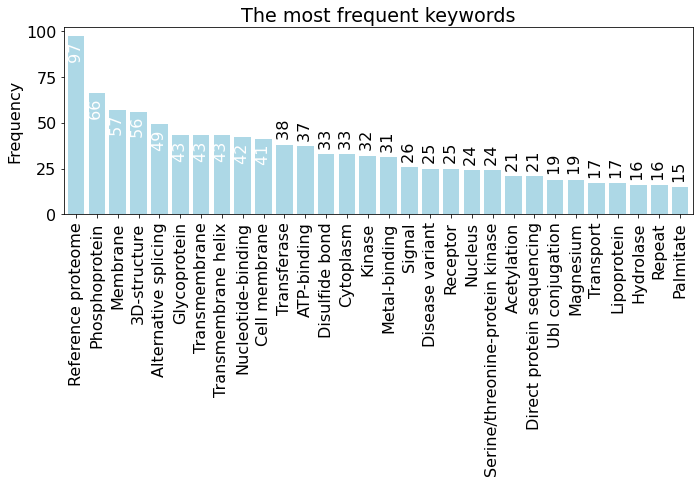

In [49]:
most_common_keywords = keyword_counter.most_common(30)
y = [count for keyword, count in most_common_keywords]
x = [keyword for keyword, count in most_common_keywords]

plt.rcParams["figure.figsize"] = (10,7)
plt.rcParams.update({'font.size': 16})

plt.bar(x, y, color='lightblue')
plt.title("The most frequent keywords")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
for i, (tag, count) in enumerate(most_common_keywords):
    plt.text(i, count, f' {count} ', rotation=90, size=16,
             ha='center', va='top' if i < 10 else 'bottom', color='white' if i < 10 else 'black')
plt.xlim(-0.6, len(x)-0.4) # optionally set tighter x lims
plt.tight_layout() # change the whitespace such that all labels fit nicely
plt.show()

In [50]:
# I tried to use the function from my previous pandas dataframe but i got an error when there were no keywords, 
# I didn't understanden how to correct this, so I use your method reading from a csv file
r = set(task2_res.UniProt)
c = list(r)[200:300]
sel = ','.join(c)
## see UniProt API document here: https://www.ebi.ac.uk/proteins/api/doc/#!/proteins/search
url = 'https://www.ebi.ac.uk/proteins/api/proteins?offset=0&size=100&accession='+ sel
t = requests.get(url, headers={'Accept': 'application/json'})

In [51]:
all_keywords=[]
for jlist in t.json():
    all_keywords.extend(get_keywords(jlist))
keyword_counter = Counter(all_keywords)    
print(keyword_counter)

Counter({'Reference proteome': 96, '3D-structure': 69, 'Phosphoprotein': 66, 'Membrane': 59, 'Alternative splicing': 54, 'Cytoplasm': 42, 'Cell membrane': 41, 'Transferase': 38, 'Transmembrane': 37, 'Transmembrane helix': 37, 'Nucleotide-binding': 36, 'Glycoprotein': 36, 'ATP-binding': 33, 'Nucleus': 32, 'Disulfide bond': 31, 'Kinase': 30, 'Disease variant': 28, 'Receptor': 23, 'Metal-binding': 22, 'Serine/threonine-protein kinase': 22, 'Ubl conjugation': 22, 'Acetylation': 21, 'Repeat': 20, 'Signal': 18, 'Hydrolase': 17, 'Direct protein sequencing': 15, 'G-protein coupled receptor': 15, 'Transducer': 15, 'Cell junction': 14, 'Synapse': 13, 'Transport': 13, 'Zinc': 13, 'Lipoprotein': 13, 'Endoplasmic reticulum': 10, 'Cell cycle': 10, 'Ion transport': 10, 'Magnesium': 9, 'Ion channel': 9, 'Transcription': 9, 'Transcription regulation': 9, 'Isopeptide bond': 8, 'Lipid metabolism': 8, 'Calcium': 8, 'Zinc-finger': 8, 'Palmitate': 8, 'Calmodulin-binding': 8, 'Postsynaptic cell membrane': 7,

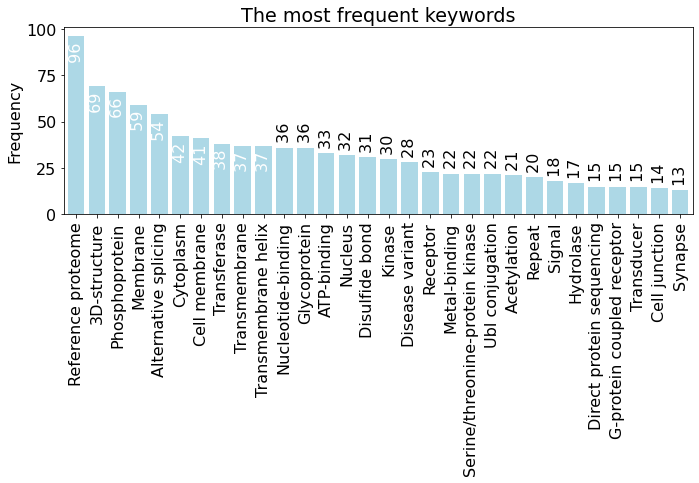

In [52]:
most_common_keywords = keyword_counter.most_common(30)
y = [count for keyword, count in most_common_keywords]
x = [keyword for keyword, count in most_common_keywords]

plt.rcParams["figure.figsize"] = (10,7)
plt.rcParams.update({'font.size': 16})

plt.bar(x, y, color='lightblue')
plt.title("The most frequent keywords")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
for i, (tag, count) in enumerate(most_common_keywords):
    plt.text(i, count, f' {count} ', rotation=90, size=16,
             ha='center', va='top' if i < 10 else 'bottom', color='white' if i < 10 else 'black')
plt.xlim(-0.6, len(x)-0.4) # optionally set tighter x lims
plt.tight_layout() # change the whitespace such that all labels fit nicely
plt.show()

In [53]:
# I tried to use the function from my previous pandas dataframe but i got an error when there were no keywords, 
# I didn't understanden how to correct this, so I use your method reading from a csv file
r = set(task2_res.UniProt)
c = list(r)[300:400]
sel = ','.join(c)
## see UniProt API document here: https://www.ebi.ac.uk/proteins/api/doc/#!/proteins/search
url = 'https://www.ebi.ac.uk/proteins/api/proteins?offset=0&size=100&accession='+ sel
t = requests.get(url, headers={'Accept': 'application/json'})

In [54]:
all_keywords=[]
for jlist in t.json():
    all_keywords.extend(get_keywords(jlist))
keyword_counter = Counter(all_keywords)    
print(keyword_counter)

Counter({'Reference proteome': 91, 'Phosphoprotein': 63, 'Membrane': 58, '3D-structure': 53, 'Alternative splicing': 50, 'Transferase': 46, 'Glycoprotein': 43, 'Nucleotide-binding': 41, 'Transmembrane': 41, 'Transmembrane helix': 41, 'Cell membrane': 39, 'ATP-binding': 37, 'Cytoplasm': 34, 'Kinase': 34, 'Disulfide bond': 30, 'Receptor': 28, 'Signal': 26, 'Metal-binding': 23, 'Disease variant': 23, 'Nucleus': 22, 'Repeat': 20, 'Direct protein sequencing': 20, 'Ubl conjugation': 19, 'Acetylation': 18, 'Serine/threonine-protein kinase': 16, 'Lipid metabolism': 14, 'Tyrosine-protein kinase': 13, 'G-protein coupled receptor': 13, 'Transducer': 13, 'Zinc': 12, 'Transport': 12, 'Hydrolase': 11, 'Magnesium': 11, 'Cell junction': 11, 'Ion transport': 11, 'Lipoprotein': 11, 'Synapse': 10, 'Endoplasmic reticulum': 9, 'Palmitate': 9, 'Mitochondrion': 9, 'Cell projection': 9, 'Ion channel': 8, 'Apoptosis': 8, 'Host-virus interaction': 7, 'Postsynaptic cell membrane': 7, 'Isopeptide bond': 7, 'Proto

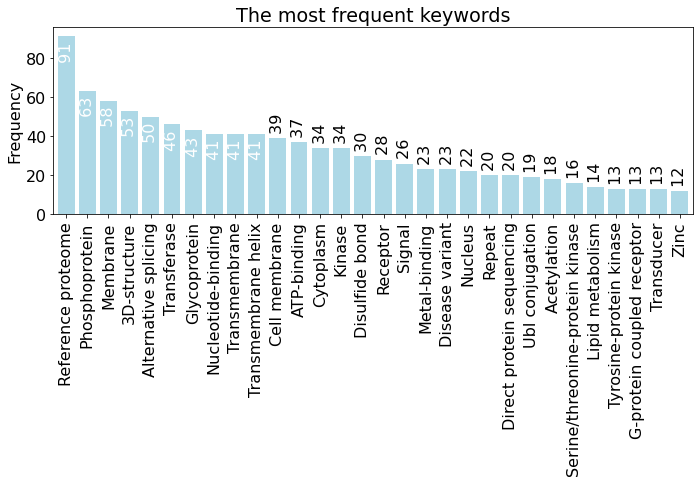

In [55]:
most_common_keywords = keyword_counter.most_common(30)
y = [count for keyword, count in most_common_keywords]
x = [keyword for keyword, count in most_common_keywords]

plt.rcParams["figure.figsize"] = (10,7)
plt.rcParams.update({'font.size': 16})

plt.bar(x, y, color='lightblue')
plt.title("The most frequent keywords")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
for i, (tag, count) in enumerate(most_common_keywords):
    plt.text(i, count, f' {count} ', rotation=90, size=16,
             ha='center', va='top' if i < 10 else 'bottom', color='white' if i < 10 else 'black')
plt.xlim(-0.6, len(x)-0.4) # optionally set tighter x lims
plt.tight_layout() # change the whitespace such that all labels fit nicely
plt.show()

In [56]:
# I tried to use the function from my previous pandas dataframe but i got an error when there were no keywords, 
# I didn't understanden how to correct this, so I use your method reading from a csv file
r = set(task2_res.UniProt)
c = list(r)[400:500]
sel = ','.join(c)
## see UniProt API document here: https://www.ebi.ac.uk/proteins/api/doc/#!/proteins/search
url = 'https://www.ebi.ac.uk/proteins/api/proteins?offset=0&size=100&accession='+ sel
t = requests.get(url, headers={'Accept': 'application/json'})

In [57]:
all_keywords=[]
for jlist in t.json():
    all_keywords.extend(get_keywords(jlist))
keyword_counter = Counter(all_keywords)    
print(keyword_counter)

Counter({'Reference proteome': 95, '3D-structure': 69, 'Phosphoprotein': 67, 'Alternative splicing': 59, 'Membrane': 49, 'Cytoplasm': 41, 'Nucleotide-binding': 39, 'Cell membrane': 38, 'Metal-binding': 35, 'ATP-binding': 35, 'Transferase': 34, 'Glycoprotein': 33, 'Nucleus': 32, 'Transmembrane': 32, 'Transmembrane helix': 31, 'Kinase': 31, 'Direct protein sequencing': 29, 'Ubl conjugation': 28, 'Repeat': 27, 'Disulfide bond': 27, 'Disease variant': 25, 'Serine/threonine-protein kinase': 24, 'Receptor': 21, 'Acetylation': 20, 'Signal': 20, 'Zinc': 17, 'Methylation': 16, 'Transcription': 14, 'Transcription regulation': 14, 'Isopeptide bond': 14, 'Magnesium': 14, 'Transport': 13, 'Cell projection': 13, 'Hydrolase': 12, 'Cytoskeleton': 12, 'Lipoprotein': 11, 'Cell junction': 11, 'DNA-binding': 10, 'Lipid metabolism': 10, 'G-protein coupled receptor': 10, 'Transducer': 10, 'Secreted': 9, 'Palmitate': 8, 'Host-virus interaction': 8, 'Zinc-finger': 8, 'Apoptosis': 8, 'Synapse': 8, 'Chromatin r

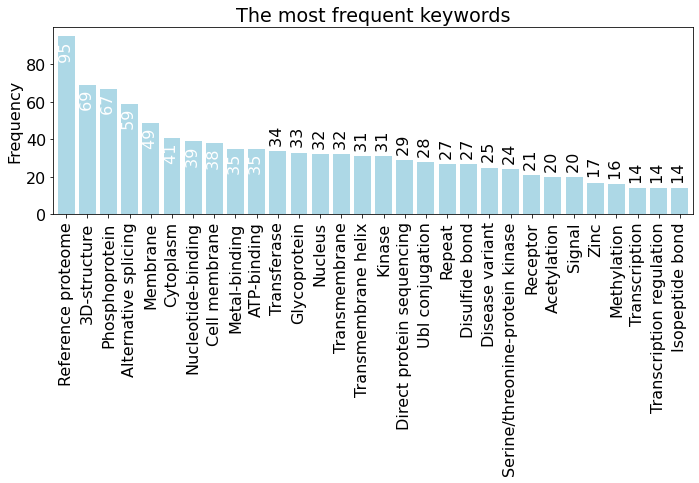

In [58]:
most_common_keywords = keyword_counter.most_common(30)
y = [count for keyword, count in most_common_keywords]
x = [keyword for keyword, count in most_common_keywords]

plt.rcParams["figure.figsize"] = (10,7)
plt.rcParams.update({'font.size': 16})

plt.bar(x, y, color='lightblue')
plt.title("The most frequent keywords")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
for i, (tag, count) in enumerate(most_common_keywords):
    plt.text(i, count, f' {count} ', rotation=90, size=16,
             ha='center', va='top' if i < 10 else 'bottom', color='white' if i < 10 else 'black')
plt.xlim(-0.6, len(x)-0.4) # optionally set tighter x lims
plt.tight_layout() # change the whitespace such that all labels fit nicely
plt.show()

In [59]:
# I tried to use the function from my previous pandas dataframe but i got an error when there were no keywords, 
# I didn't understanden how to correct this, so I use your method reading from a csv file
r = set(task2_res.UniProt)
c = list(r)[500:600]
sel = ','.join(c)
## see UniProt API document here: https://www.ebi.ac.uk/proteins/api/doc/#!/proteins/search
url = 'https://www.ebi.ac.uk/proteins/api/proteins?offset=0&size=100&accession='+ sel
t = requests.get(url, headers={'Accept': 'application/json'})

In [60]:
all_keywords=[]
for jlist in t.json():
    all_keywords.extend(get_keywords(jlist))
keyword_counter = Counter(all_keywords)    
print(keyword_counter)

Counter({'Reference proteome': 90, '3D-structure': 64, 'Phosphoprotein': 59, 'Membrane': 44, 'Nucleotide-binding': 40, 'Transferase': 39, 'ATP-binding': 37, 'Cytoplasm': 37, 'Cell membrane': 35, 'Kinase': 35, 'Alternative splicing': 34, 'Nucleus': 33, 'Transmembrane': 32, 'Transmembrane helix': 32, 'Glycoprotein': 31, 'Direct protein sequencing': 29, 'Metal-binding': 27, 'Serine/threonine-protein kinase': 25, 'Disulfide bond': 24, 'Disease variant': 23, 'Receptor': 22, 'Acetylation': 21, 'Repeat': 17, 'G-protein coupled receptor': 15, 'Transducer': 15, 'Ubl conjugation': 15, 'Signal': 14, 'Hydrolase': 14, 'Magnesium': 14, 'Lipoprotein': 13, 'Tyrosine-protein kinase': 12, 'Cytoskeleton': 11, 'Cell cycle': 11, 'Palmitate': 11, 'Zinc': 10, 'Host-virus interaction': 10, 'Transcription': 9, 'Transcription regulation': 9, 'Apoptosis': 9, 'Coiled coil': 8, 'Cell junction': 8, 'Cell projection': 8, 'Methylation': 7, 'Transport': 7, 'Isopeptide bond': 7, 'Calcium': 6, 'Chromosome': 6, 'Cell div

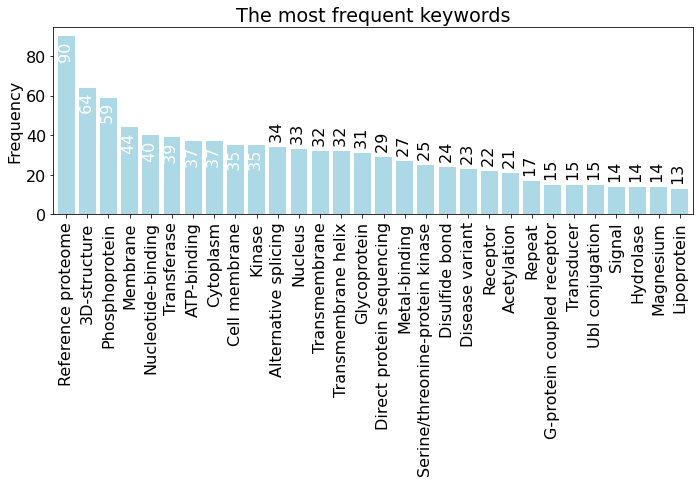

In [61]:
most_common_keywords = keyword_counter.most_common(30)
y = [count for keyword, count in most_common_keywords]
x = [keyword for keyword, count in most_common_keywords]

plt.rcParams["figure.figsize"] = (10,7)
plt.rcParams.update({'font.size': 16})

plt.bar(x, y, color='lightblue')
plt.title("The most frequent keywords")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
for i, (tag, count) in enumerate(most_common_keywords):
    plt.text(i, count, f' {count} ', rotation=90, size=16,
             ha='center', va='top' if i < 10 else 'bottom', color='white' if i < 10 else 'black')
plt.xlim(-0.6, len(x)-0.4) # optionally set tighter x lims
plt.tight_layout() # change the whitespace such that all labels fit nicely
plt.show()

In [62]:
# I tried to use the function from my previous pandas dataframe but i got an error when there were no keywords, 
# I didn't understanden how to correct this, so I use your method reading from a csv file
r = set(task2_res.UniProt)
c = list(r)[600:700]
sel = ','.join(c)
## see UniProt API document here: https://www.ebi.ac.uk/proteins/api/doc/#!/proteins/search
url = 'https://www.ebi.ac.uk/proteins/api/proteins?offset=0&size=100&accession='+ sel
t = requests.get(url, headers={'Accept': 'application/json'})

In [63]:
all_keywords=[]
for jlist in t.json():
    all_keywords.extend(get_keywords(jlist))
keyword_counter = Counter(all_keywords)    
print(keyword_counter)

Counter({'Reference proteome': 94, '3D-structure': 57, 'Alternative splicing': 54, 'Phosphoprotein': 51, 'Membrane': 49, 'Glycoprotein': 37, 'Cytoplasm': 37, 'Transferase': 35, 'Nucleotide-binding': 33, 'Transmembrane': 33, 'Transmembrane helix': 33, 'Cell membrane': 32, 'ATP-binding': 31, 'Kinase': 29, 'Disulfide bond': 27, 'Direct protein sequencing': 27, 'Serine/threonine-protein kinase': 25, 'Nucleus': 23, 'Metal-binding': 23, 'Signal': 20, 'Acetylation': 20, 'Disease variant': 20, 'Hydrolase': 17, 'Receptor': 17, 'Ubl conjugation': 16, 'Magnesium': 16, 'Repeat': 14, 'Transport': 13, 'G-protein coupled receptor': 11, 'Transducer': 11, 'Lipid metabolism': 11, 'Transcription': 10, 'Transcription regulation': 10, 'Cell projection': 10, 'Endoplasmic reticulum': 10, 'Ion transport': 9, 'Cell junction': 8, 'Methylation': 8, 'Isopeptide bond': 8, 'Apoptosis': 7, 'Ribonucleoprotein': 7, 'Ribosomal protein': 7, 'Cytoplasmic vesicle': 6, 'Secreted': 6, 'Synapse': 6, 'Lipoprotein': 6, 'Host-v

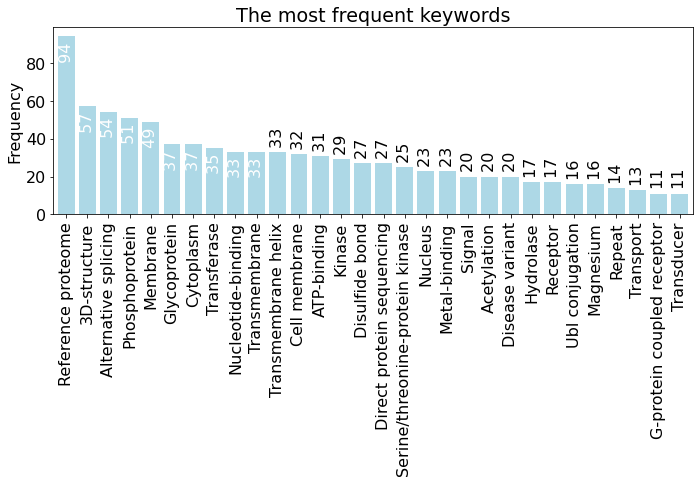

In [64]:
most_common_keywords = keyword_counter.most_common(30)
y = [count for keyword, count in most_common_keywords]
x = [keyword for keyword, count in most_common_keywords]

plt.rcParams["figure.figsize"] = (10,7)
plt.rcParams.update({'font.size': 16})

plt.bar(x, y, color='lightblue')
plt.title("The most frequent keywords")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
for i, (tag, count) in enumerate(most_common_keywords):
    plt.text(i, count, f' {count} ', rotation=90, size=16,
             ha='center', va='top' if i < 10 else 'bottom', color='white' if i < 10 else 'black')
plt.xlim(-0.6, len(x)-0.4) # optionally set tighter x lims
plt.tight_layout() # change the whitespace such that all labels fit nicely
plt.show()

In [65]:
# I tried to use the function from my previous pandas dataframe but i got an error when there were no keywords, 
# I didn't understanden how to correct this, so I use your method reading from a csv file
r = set(task2_res.UniProt)
c = list(r)[700:800]
sel = ','.join(c)
## see UniProt API document here: https://www.ebi.ac.uk/proteins/api/doc/#!/proteins/search
url = 'https://www.ebi.ac.uk/proteins/api/proteins?offset=0&size=100&accession='+ sel
t = requests.get(url, headers={'Accept': 'application/json'})

In [66]:
all_keywords=[]
for jlist in t.json():
    all_keywords.extend(get_keywords(jlist))
keyword_counter = Counter(all_keywords)    
print(keyword_counter)

Counter({'Reference proteome': 89, '3D-structure': 67, 'Phosphoprotein': 61, 'Alternative splicing': 49, 'Cytoplasm': 45, 'Membrane': 42, 'Transferase': 40, 'Nucleotide-binding': 37, 'ATP-binding': 34, 'Kinase': 31, 'Nucleus': 29, 'Cell membrane': 29, 'Direct protein sequencing': 27, 'Serine/threonine-protein kinase': 27, 'Glycoprotein': 27, 'Metal-binding': 26, 'Transmembrane': 24, 'Transmembrane helix': 24, 'Ubl conjugation': 23, 'Disulfide bond': 23, 'Acetylation': 23, 'Disease variant': 18, 'Repeat': 18, 'Receptor': 17, 'Hydrolase': 17, 'Isopeptide bond': 14, 'Signal': 13, 'Transcription': 12, 'Transcription regulation': 12, 'Cell projection': 12, 'Cytoskeleton': 12, 'Lipoprotein': 12, 'Magnesium': 11, 'Zinc': 10, 'Cell junction': 9, 'G-protein coupled receptor': 9, 'Transducer': 9, 'Endoplasmic reticulum': 8, 'Cell cycle': 8, 'Lipid metabolism': 8, 'Palmitate': 8, 'Methylation': 8, 'Transport': 8, 'Apoptosis': 7, 'Synapse': 7, 'Lipid-binding': 6, 'Mitochondrion': 6, 'Host-virus in

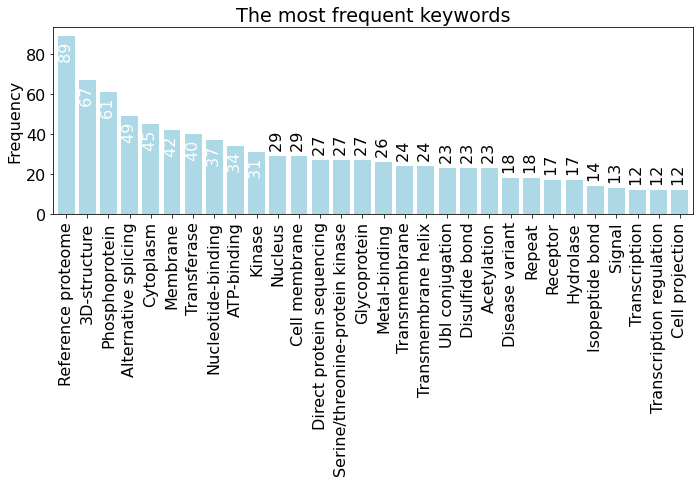

In [67]:
most_common_keywords = keyword_counter.most_common(30)
y = [count for keyword, count in most_common_keywords]
x = [keyword for keyword, count in most_common_keywords]

plt.rcParams["figure.figsize"] = (10,7)
plt.rcParams.update({'font.size': 16})

plt.bar(x, y, color='lightblue')
plt.title("The most frequent keywords")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
for i, (tag, count) in enumerate(most_common_keywords):
    plt.text(i, count, f' {count} ', rotation=90, size=16,
             ha='center', va='top' if i < 10 else 'bottom', color='white' if i < 10 else 'black')
plt.xlim(-0.6, len(x)-0.4) # optionally set tighter x lims
plt.tight_layout() # change the whitespace such that all labels fit nicely
plt.show()

In [68]:
# I tried to use the function from my previous pandas dataframe but i got an error when there were no keywords, 
# I didn't understanden how to correct this, so I use your method reading from a csv file
r = set(task2_res.UniProt)
c = list(r)[800:900]
sel = ','.join(c)
## see UniProt API document here: https://www.ebi.ac.uk/proteins/api/doc/#!/proteins/search
url = 'https://www.ebi.ac.uk/proteins/api/proteins?offset=0&size=100&accession='+ sel
t = requests.get(url, headers={'Accept': 'application/json'})

In [69]:
all_keywords=[]
for jlist in t.json():
    all_keywords.extend(get_keywords(jlist))
keyword_counter = Counter(all_keywords)    
print(keyword_counter)

Counter({'Reference proteome': 92, '3D-structure': 69, 'Membrane': 52, 'Phosphoprotein': 49, 'Alternative splicing': 47, 'Glycoprotein': 39, 'Transmembrane': 38, 'Transmembrane helix': 38, 'Cell membrane': 38, 'Cytoplasm': 33, 'Disulfide bond': 32, 'Metal-binding': 31, 'Nucleotide-binding': 30, 'Transferase': 29, 'ATP-binding': 28, 'Receptor': 28, 'Direct protein sequencing': 27, 'Disease variant': 25, 'Nucleus': 24, 'Kinase': 24, 'Signal': 24, 'Acetylation': 19, 'Serine/threonine-protein kinase': 18, 'Repeat': 18, 'Hydrolase': 17, 'Magnesium': 16, 'Ubl conjugation': 16, 'G-protein coupled receptor': 15, 'Transducer': 15, 'Transport': 14, 'Cytoskeleton': 13, 'Cell junction': 13, 'Synapse': 13, 'Lipoprotein': 13, 'Cell projection': 12, 'Transcription': 12, 'Transcription regulation': 12, 'Isopeptide bond': 11, 'Ion transport': 10, 'Palmitate': 10, 'Endoplasmic reticulum': 9, 'Lipid metabolism': 9, 'DNA-binding': 9, 'Postsynaptic cell membrane': 9, 'Zinc': 8, 'RNA-binding': 8, 'Ion chann

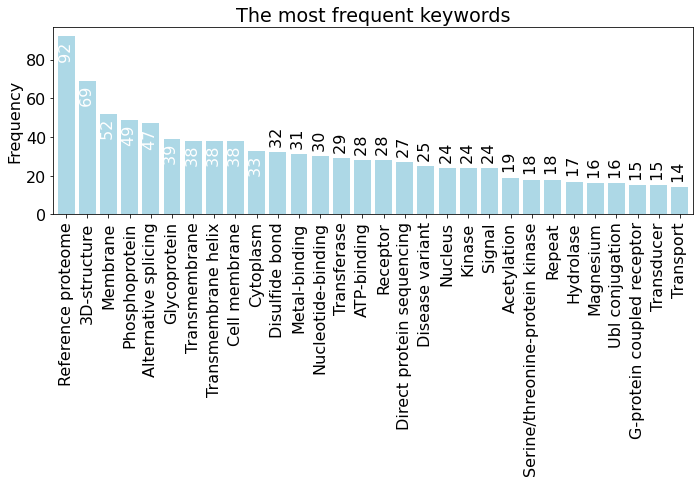

In [70]:
most_common_keywords = keyword_counter.most_common(30)
y = [count for keyword, count in most_common_keywords]
x = [keyword for keyword, count in most_common_keywords]

plt.rcParams["figure.figsize"] = (10,7)
plt.rcParams.update({'font.size': 16})

plt.bar(x, y, color='lightblue')
plt.title("The most frequent keywords")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
for i, (tag, count) in enumerate(most_common_keywords):
    plt.text(i, count, f' {count} ', rotation=90, size=16,
             ha='center', va='top' if i < 10 else 'bottom', color='white' if i < 10 else 'black')
plt.xlim(-0.6, len(x)-0.4) # optionally set tighter x lims
plt.tight_layout() # change the whitespace such that all labels fit nicely
plt.show()

In [71]:
# I tried to use the function from my previous pandas dataframe but i got an error when there were no keywords, 
# I didn't understanden how to correct this, so I use your method reading from a csv file
r = set(task2_res.UniProt)
c = list(r)[900:1000]
sel = ','.join(c)
## see UniProt API document here: https://www.ebi.ac.uk/proteins/api/doc/#!/proteins/search
url = 'https://www.ebi.ac.uk/proteins/api/proteins?offset=0&size=100&accession='+ sel
t = requests.get(url, headers={'Accept': 'application/json'})

In [72]:
all_keywords=[]
for jlist in t.json():
    all_keywords.extend(get_keywords(jlist))
keyword_counter = Counter(all_keywords)    
print(keyword_counter)

Counter({'Reference proteome': 94, '3D-structure': 68, 'Phosphoprotein': 66, 'Membrane': 56, 'Alternative splicing': 50, 'Nucleotide-binding': 41, 'Cell membrane': 38, 'Cytoplasm': 36, 'Transferase': 35, 'Transmembrane': 35, 'Transmembrane helix': 35, 'ATP-binding': 34, 'Glycoprotein': 34, 'Nucleus': 32, 'Metal-binding': 29, 'Kinase': 29, 'Direct protein sequencing': 27, 'Disulfide bond': 25, 'Receptor': 25, 'Disease variant': 23, 'Serine/threonine-protein kinase': 23, 'Acetylation': 23, 'Ubl conjugation': 23, 'Transport': 19, 'Signal': 18, 'Repeat': 15, 'Zinc': 14, 'Hydrolase': 13, 'Ion transport': 13, 'Magnesium': 12, 'G-protein coupled receptor': 12, 'Transducer': 12, 'Transcription': 11, 'Transcription regulation': 11, 'Cell cycle': 11, 'Cytoskeleton': 11, 'Lipoprotein': 11, 'Cell junction': 11, 'Isopeptide bond': 10, 'Palmitate': 10, 'Synapse': 9, 'Postsynaptic cell membrane': 8, 'Ion channel': 8, 'Apoptosis': 8, 'Cell projection': 8, 'Methylation': 8, 'Tyrosine-protein kinase': 8

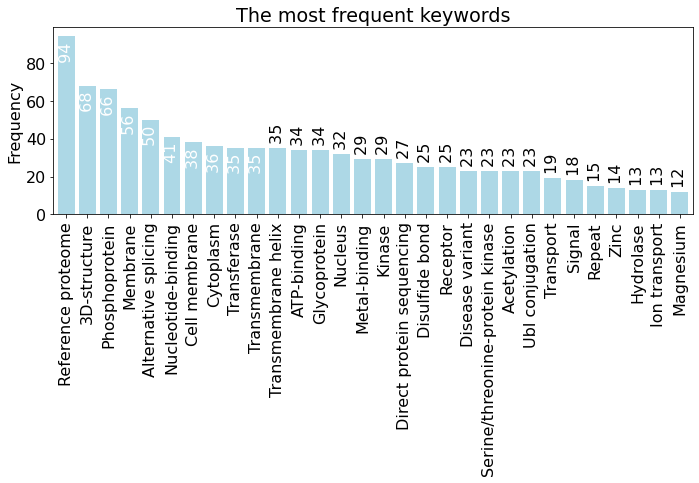

In [73]:
most_common_keywords = keyword_counter.most_common(30)
y = [count for keyword, count in most_common_keywords]
x = [keyword for keyword, count in most_common_keywords]

plt.rcParams["figure.figsize"] = (10,7)
plt.rcParams.update({'font.size': 16})

plt.bar(x, y, color='lightblue')
plt.title("The most frequent keywords")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
for i, (tag, count) in enumerate(most_common_keywords):
    plt.text(i, count, f' {count} ', rotation=90, size=16,
             ha='center', va='top' if i < 10 else 'bottom', color='white' if i < 10 else 'black')
plt.xlim(-0.6, len(x)-0.4) # optionally set tighter x lims
plt.tight_layout() # change the whitespace such that all labels fit nicely
plt.show()

In [74]:
# I tried to use the function from my previous pandas dataframe but i got an error when there were no keywords, 
# I didn't understanden how to correct this, so I use your method reading from a csv file
r = set(task2_res.UniProt)
c = list(r)[800:900]
sel = ','.join(c)
## see UniProt API document here: https://www.ebi.ac.uk/proteins/api/doc/#!/proteins/search
url = 'https://www.ebi.ac.uk/proteins/api/proteins?offset=0&size=100&accession='+ sel
t = requests.get(url, headers={'Accept': 'application/json'})

In [75]:
all_keywords=[]
for jlist in t.json():
    all_keywords.extend(get_keywords(jlist))
keyword_counter = Counter(all_keywords)    
print(keyword_counter)

Counter({'Reference proteome': 92, '3D-structure': 69, 'Membrane': 52, 'Phosphoprotein': 49, 'Alternative splicing': 47, 'Glycoprotein': 39, 'Transmembrane': 38, 'Transmembrane helix': 38, 'Cell membrane': 38, 'Cytoplasm': 33, 'Disulfide bond': 32, 'Metal-binding': 31, 'Nucleotide-binding': 30, 'Transferase': 29, 'ATP-binding': 28, 'Receptor': 28, 'Direct protein sequencing': 27, 'Disease variant': 25, 'Nucleus': 24, 'Kinase': 24, 'Signal': 24, 'Acetylation': 19, 'Serine/threonine-protein kinase': 18, 'Repeat': 18, 'Hydrolase': 17, 'Magnesium': 16, 'Ubl conjugation': 16, 'G-protein coupled receptor': 15, 'Transducer': 15, 'Transport': 14, 'Cytoskeleton': 13, 'Cell junction': 13, 'Synapse': 13, 'Lipoprotein': 13, 'Cell projection': 12, 'Transcription': 12, 'Transcription regulation': 12, 'Isopeptide bond': 11, 'Ion transport': 10, 'Palmitate': 10, 'Endoplasmic reticulum': 9, 'Lipid metabolism': 9, 'DNA-binding': 9, 'Postsynaptic cell membrane': 9, 'Zinc': 8, 'RNA-binding': 8, 'Ion chann

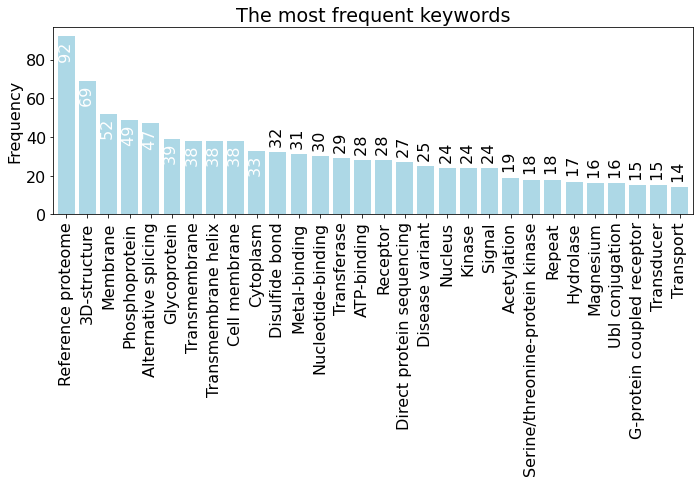

In [76]:
most_common_keywords = keyword_counter.most_common(30)
y = [count for keyword, count in most_common_keywords]
x = [keyword for keyword, count in most_common_keywords]

plt.rcParams["figure.figsize"] = (10,7)
plt.rcParams.update({'font.size': 16})

plt.bar(x, y, color='lightblue')
plt.title("The most frequent keywords")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
for i, (tag, count) in enumerate(most_common_keywords):
    plt.text(i, count, f' {count} ', rotation=90, size=16,
             ha='center', va='top' if i < 10 else 'bottom', color='white' if i < 10 else 'black')
plt.xlim(-0.6, len(x)-0.4) # optionally set tighter x lims
plt.tight_layout() # change the whitespace such that all labels fit nicely
plt.show()

In [77]:
# I tried to use the function from my previous pandas dataframe but i got an error when there were no keywords, 
# I didn't understanden how to correct this, so I use your method reading from a csv file
r = set(task2_res.UniProt)
c = list(r)[1000:1100]
sel = ','.join(c)
## see UniProt API document here: https://www.ebi.ac.uk/proteins/api/doc/#!/proteins/search
url = 'https://www.ebi.ac.uk/proteins/api/proteins?offset=0&size=100&accession='+ sel
t = requests.get(url, headers={'Accept': 'application/json'})

In [78]:
all_keywords=[]
for jlist in t.json():
    all_keywords.extend(get_keywords(jlist))
keyword_counter = Counter(all_keywords)    
print(keyword_counter)

Counter({'Reference proteome': 95, '3D-structure': 63, 'Membrane': 62, 'Phosphoprotein': 52, 'Alternative splicing': 44, 'Transmembrane': 43, 'Transmembrane helix': 43, 'Cell membrane': 43, 'Glycoprotein': 38, 'Nucleotide-binding': 35, 'Cytoplasm': 33, 'Transferase': 33, 'ATP-binding': 32, 'Disulfide bond': 30, 'Receptor': 30, 'Metal-binding': 28, 'Direct protein sequencing': 25, 'Kinase': 25, 'Nucleus': 24, 'Disease variant': 23, 'Transducer': 18, 'Serine/threonine-protein kinase': 18, 'Repeat': 18, 'Signal': 18, 'Ubl conjugation': 18, 'G-protein coupled receptor': 17, 'Lipoprotein': 15, 'Acetylation': 14, 'Transport': 14, 'Palmitate': 13, 'Zinc': 13, 'Ion transport': 12, 'Magnesium': 11, 'Hydrolase': 11, 'Calcium': 10, 'Endoplasmic reticulum': 10, 'Lipid metabolism': 9, 'Ion channel': 9, 'Oxidoreductase': 9, 'Transcription': 8, 'Transcription regulation': 8, 'Isopeptide bond': 8, 'Zinc-finger': 7, 'Mitochondrion': 7, 'RNA-binding': 7, 'Tyrosine-protein kinase': 7, 'Cell junction': 7,

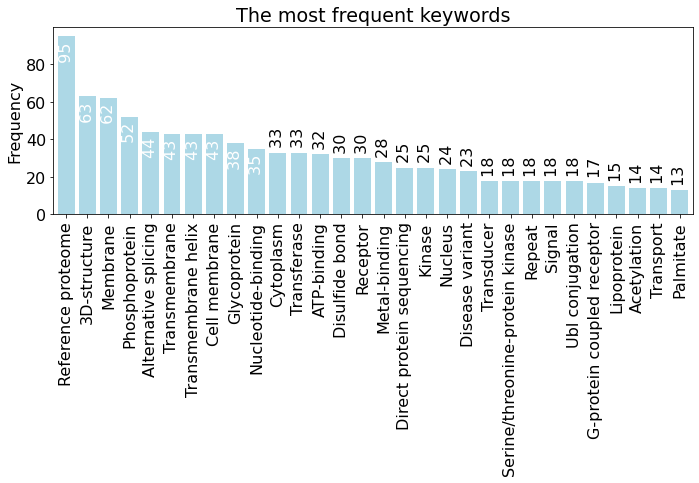

In [79]:
most_common_keywords = keyword_counter.most_common(30)
y = [count for keyword, count in most_common_keywords]
x = [keyword for keyword, count in most_common_keywords]

plt.rcParams["figure.figsize"] = (10,7)
plt.rcParams.update({'font.size': 16})

plt.bar(x, y, color='lightblue')
plt.title("The most frequent keywords")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
for i, (tag, count) in enumerate(most_common_keywords):
    plt.text(i, count, f' {count} ', rotation=90, size=16,
             ha='center', va='top' if i < 10 else 'bottom', color='white' if i < 10 else 'black')
plt.xlim(-0.6, len(x)-0.4) # optionally set tighter x lims
plt.tight_layout() # change the whitespace such that all labels fit nicely
plt.show()

In [80]:
# I tried to use the function from my previous pandas dataframe but i got an error when there were no keywords, 
# I didn't understanden how to correct this, so I use your method reading from a csv file
r = set(task2_res.UniProt)
c = list(r)[1100:1200]
sel = ','.join(c)
## see UniProt API document here: https://www.ebi.ac.uk/proteins/api/doc/#!/proteins/search
url = 'https://www.ebi.ac.uk/proteins/api/proteins?offset=0&size=100&accession='+ sel
t = requests.get(url, headers={'Accept': 'application/json'})

In [81]:
all_keywords=[]
for jlist in t.json():
    all_keywords.extend(get_keywords(jlist))
keyword_counter = Counter(all_keywords)    
print(keyword_counter)

Counter({'Reference proteome': 93, '3D-structure': 70, 'Phosphoprotein': 56, 'Alternative splicing': 50, 'Membrane': 42, 'Nucleotide-binding': 39, 'Transferase': 39, 'ATP-binding': 38, 'Cytoplasm': 38, 'Metal-binding': 34, 'Kinase': 31, 'Nucleus': 30, 'Acetylation': 29, 'Cell membrane': 26, 'Serine/threonine-protein kinase': 25, 'Glycoprotein': 25, 'Ubl conjugation': 24, 'Direct protein sequencing': 23, 'Disease variant': 21, 'Disulfide bond': 21, 'Transmembrane': 21, 'Transmembrane helix': 21, 'Zinc': 17, 'Receptor': 16, 'Hydrolase': 14, 'Transcription': 14, 'Transcription regulation': 14, 'Isopeptide bond': 13, 'Apoptosis': 12, 'Oxidoreductase': 12, 'Transport': 12, 'Signal': 11, 'Lipid metabolism': 10, 'Repeat': 10, 'Mitochondrion': 10, 'Magnesium': 9, 'Lipoprotein': 9, 'Cell cycle': 8, 'Methylation': 8, 'Host-virus interaction': 8, 'Iron': 8, 'G-protein coupled receptor': 8, 'Transducer': 8, 'Endoplasmic reticulum': 7, 'Monooxygenase': 7, 'Immunity': 6, 'Cytoskeleton': 6, 'Heme': 6

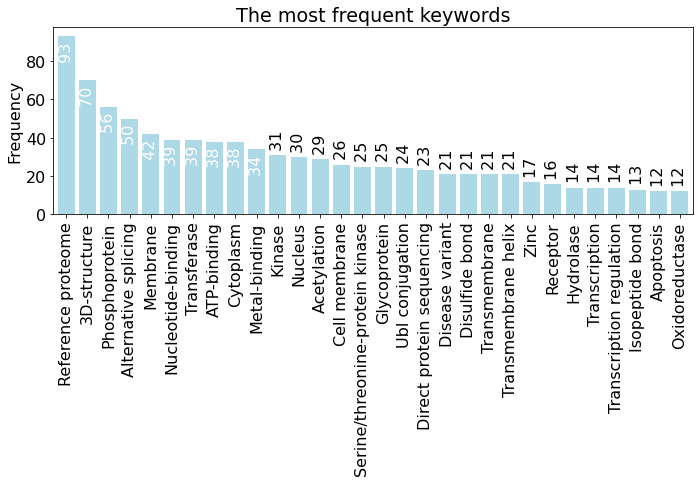

In [82]:
most_common_keywords = keyword_counter.most_common(30)
y = [count for keyword, count in most_common_keywords]
x = [keyword for keyword, count in most_common_keywords]

plt.rcParams["figure.figsize"] = (10,7)
plt.rcParams.update({'font.size': 16})

plt.bar(x, y, color='lightblue')
plt.title("The most frequent keywords")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
for i, (tag, count) in enumerate(most_common_keywords):
    plt.text(i, count, f' {count} ', rotation=90, size=16,
             ha='center', va='top' if i < 10 else 'bottom', color='white' if i < 10 else 'black')
plt.xlim(-0.6, len(x)-0.4) # optionally set tighter x lims
plt.tight_layout() # change the whitespace such that all labels fit nicely
plt.show()

In [83]:
# I tried to use the function from my previous pandas dataframe but i got an error when there were no keywords, 
# I didn't understanden how to correct this, so I use your method reading from a csv file
r = set(task2_res.UniProt)
c = list(r)[1200:1300]
sel = ','.join(c)
## see UniProt API document here: https://www.ebi.ac.uk/proteins/api/doc/#!/proteins/search
url = 'https://www.ebi.ac.uk/proteins/api/proteins?offset=0&size=100&accession='+ sel
t = requests.get(url, headers={'Accept': 'application/json'})

In [84]:
all_keywords=[]
for jlist in t.json():
    all_keywords.extend(get_keywords(jlist))
keyword_counter = Counter(all_keywords)    
print(keyword_counter)

Counter({'Reference proteome': 95, 'Membrane': 62, '3D-structure': 61, 'Phosphoprotein': 56, 'Transmembrane': 48, 'Transmembrane helix': 48, 'Alternative splicing': 48, 'Glycoprotein': 46, 'Cell membrane': 46, 'Nucleotide-binding': 41, 'ATP-binding': 38, 'Disulfide bond': 37, 'Transferase': 35, 'Kinase': 31, 'Cytoplasm': 30, 'Receptor': 30, 'Disease variant': 25, 'Metal-binding': 24, 'Nucleus': 23, 'Signal': 22, 'Direct protein sequencing': 20, 'Acetylation': 19, 'Hydrolase': 18, 'Ubl conjugation': 18, 'Repeat': 16, 'Serine/threonine-protein kinase': 16, 'Tyrosine-protein kinase': 16, 'G-protein coupled receptor': 16, 'Transducer': 16, 'Transport': 15, 'Magnesium': 12, 'Lipoprotein': 12, 'Transcription': 11, 'Transcription regulation': 11, 'Endoplasmic reticulum': 11, 'Ion transport': 11, 'DNA-binding': 9, 'Cell junction': 9, 'Palmitate': 9, 'Endosome': 8, 'Zinc': 7, 'Apoptosis': 7, 'Coiled coil': 6, 'Chromosomal rearrangement': 6, 'DNA damage': 6, 'Methylation': 6, 'Ion channel': 6, '

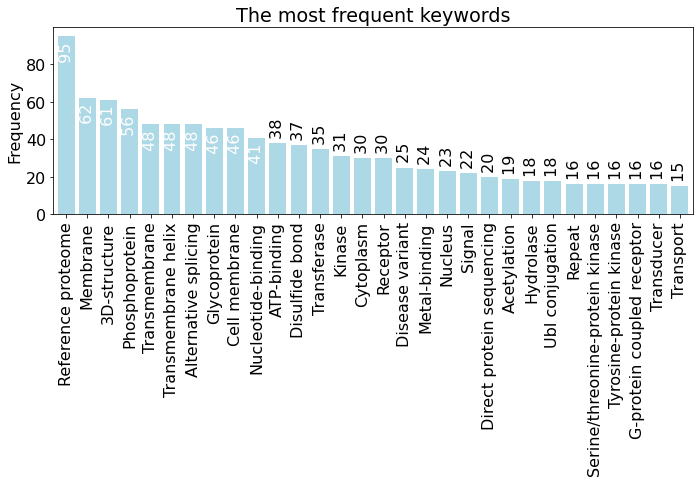

In [85]:
most_common_keywords = keyword_counter.most_common(30)
y = [count for keyword, count in most_common_keywords]
x = [keyword for keyword, count in most_common_keywords]

plt.rcParams["figure.figsize"] = (10,7)
plt.rcParams.update({'font.size': 16})

plt.bar(x, y, color='lightblue')
plt.title("The most frequent keywords")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
for i, (tag, count) in enumerate(most_common_keywords):
    plt.text(i, count, f' {count} ', rotation=90, size=16,
             ha='center', va='top' if i < 10 else 'bottom', color='white' if i < 10 else 'black')
plt.xlim(-0.6, len(x)-0.4) # optionally set tighter x lims
plt.tight_layout() # change the whitespace such that all labels fit nicely
plt.show()

In [86]:
# I tried to use the function from my previous pandas dataframe but i got an error when there were no keywords, 
# I didn't understanden how to correct this, so I use your method reading from a csv file
r = set(task2_res.UniProt)
c = list(r)[1300:1400]
sel = ','.join(c)
## see UniProt API document here: https://www.ebi.ac.uk/proteins/api/doc/#!/proteins/search
url = 'https://www.ebi.ac.uk/proteins/api/proteins?offset=0&size=100&accession='+ sel
t = requests.get(url, headers={'Accept': 'application/json'})

In [87]:
all_keywords=[]
for jlist in t.json():
    all_keywords.extend(get_keywords(jlist))
keyword_counter = Counter(all_keywords)    
print(keyword_counter)

Counter({'Reference proteome': 96, 'Phosphoprotein': 56, 'Membrane': 54, '3D-structure': 54, 'Nucleotide-binding': 48, 'ATP-binding': 43, 'Alternative splicing': 42, 'Cell membrane': 38, 'Transferase': 38, 'Transmembrane': 36, 'Transmembrane helix': 36, 'Metal-binding': 36, 'Glycoprotein': 35, 'Cytoplasm': 35, 'Kinase': 34, 'Disease variant': 26, 'Receptor': 25, 'Serine/threonine-protein kinase': 24, 'Disulfide bond': 23, 'Nucleus': 23, 'Ubl conjugation': 23, 'Direct protein sequencing': 23, 'Signal': 21, 'Magnesium': 19, 'Transcription': 15, 'Transcription regulation': 15, 'Repeat': 15, 'Hydrolase': 15, 'Acetylation': 15, 'Transport': 14, 'Cell projection': 14, 'Lipoprotein': 13, 'Cell junction': 13, 'Ion transport': 11, 'Zinc': 11, 'Proto-oncogene': 11, 'Palmitate': 11, 'Transducer': 11, 'Synapse': 11, 'Isopeptide bond': 10, 'G-protein coupled receptor': 10, 'Ion channel': 9, 'Endoplasmic reticulum': 9, 'Cell cycle': 9, 'Lipid metabolism': 8, 'Postsynaptic cell membrane': 8, 'Host-vi

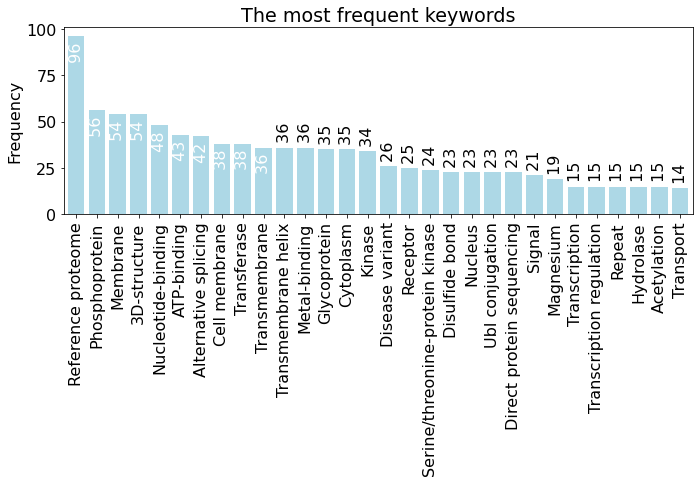

In [88]:
most_common_keywords = keyword_counter.most_common(30)
y = [count for keyword, count in most_common_keywords]
x = [keyword for keyword, count in most_common_keywords]

plt.rcParams["figure.figsize"] = (10,7)
plt.rcParams.update({'font.size': 16})

plt.bar(x, y, color='lightblue')
plt.title("The most frequent keywords")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
for i, (tag, count) in enumerate(most_common_keywords):
    plt.text(i, count, f' {count} ', rotation=90, size=16,
             ha='center', va='top' if i < 10 else 'bottom', color='white' if i < 10 else 'black')
plt.xlim(-0.6, len(x)-0.4) # optionally set tighter x lims
plt.tight_layout() # change the whitespace such that all labels fit nicely
plt.show()

In [89]:
# I tried to use the function from my previous pandas dataframe but i got an error when there were no keywords, 
# I didn't understanden how to correct this, so I use your method reading from a csv file
r = set(task2_res.UniProt)
c = list(r)[1400:1500]
sel = ','.join(c)
## see UniProt API document here: https://www.ebi.ac.uk/proteins/api/doc/#!/proteins/search
url = 'https://www.ebi.ac.uk/proteins/api/proteins?offset=0&size=100&accession='+ sel
t = requests.get(url, headers={'Accept': 'application/json'})

In [90]:
all_keywords=[]
for jlist in t.json():
    all_keywords.extend(get_keywords(jlist))
keyword_counter = Counter(all_keywords)    
print(keyword_counter)

Counter({'Reference proteome': 91, 'Phosphoprotein': 62, '3D-structure': 55, 'Alternative splicing': 52, 'Membrane': 49, 'Nucleotide-binding': 41, 'ATP-binding': 40, 'Transferase': 36, 'Transmembrane': 35, 'Transmembrane helix': 35, 'Cell membrane': 34, 'Glycoprotein': 32, 'Cytoplasm': 31, 'Nucleus': 28, 'Metal-binding': 27, 'Disulfide bond': 26, 'Kinase': 26, 'Disease variant': 25, 'Acetylation': 23, 'Signal': 22, 'Serine/threonine-protein kinase': 21, 'Ubl conjugation': 21, 'Direct protein sequencing': 21, 'Receptor': 18, 'Transport': 17, 'Repeat': 15, 'Zinc': 14, 'Ion transport': 14, 'Magnesium': 13, 'Isopeptide bond': 12, 'Coiled coil': 11, 'Lipoprotein': 11, 'Ion channel': 11, 'Hydrolase': 10, 'Cell junction': 10, 'Synapse': 10, 'Zinc-finger': 9, 'Postsynaptic cell membrane': 9, 'Endoplasmic reticulum': 8, 'Cell projection': 8, 'Lipid metabolism': 8, 'Palmitate': 8, 'Chloride': 7, 'Chloride channel': 7, 'G-protein coupled receptor': 7, 'Transducer': 7, 'Mitochondrion': 6, 'Transcr

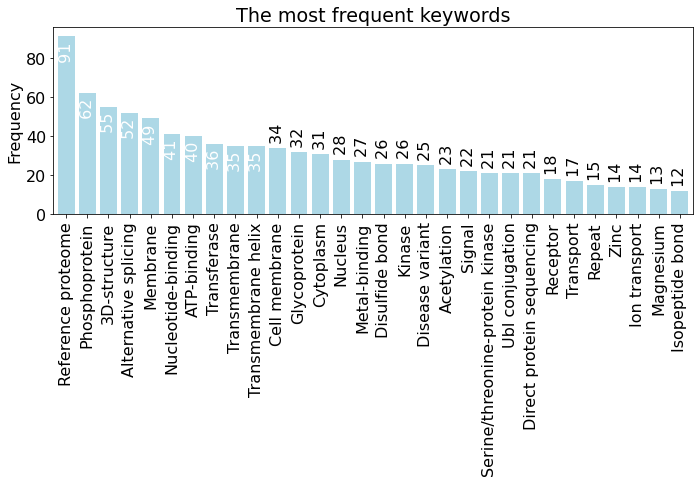

In [91]:
most_common_keywords = keyword_counter.most_common(30)
y = [count for keyword, count in most_common_keywords]
x = [keyword for keyword, count in most_common_keywords]

plt.rcParams["figure.figsize"] = (10,7)
plt.rcParams.update({'font.size': 16})

plt.bar(x, y, color='lightblue')
plt.title("The most frequent keywords")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
for i, (tag, count) in enumerate(most_common_keywords):
    plt.text(i, count, f' {count} ', rotation=90, size=16,
             ha='center', va='top' if i < 10 else 'bottom', color='white' if i < 10 else 'black')
plt.xlim(-0.6, len(x)-0.4) # optionally set tighter x lims
plt.tight_layout() # change the whitespace such that all labels fit nicely
plt.show()

In all the 100 proteins the most keywords were Protesomes.

In the last part of the exercise I noticed how the keywords associated with the protein targets were mainly proteosome, but there were many times kinase or phosphoprotein or 3D-structure or membrane. This means that the most effective targets for a drug are these and it is no surprise.
In fact, depending on where you want to act, you will look for the right target. If we want to stop the production we will act more at the level of genes, if we want to block the function then maybe at the level of structure.
